In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris['data']
y = iris['target']
# print(np.unique(y, return_counts=True))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
print(len(x))

150


In [4]:
# data
# iris = pd.read_csv('/content/Iris.csv')
# iris = iris.drop('Id', axis=1)
# x = np.array(iris.iloc[:,:-1])
# y = iris.iloc[:,-1:]

In [5]:
# iris['Species'].value_counts()

In [6]:
alpha = 0.1
sigma = 0.1

In [7]:
# adjacency matrix
adj_list =[]
weight = np.zeros((len(x),len(x)))
for i in range(len(x)):
  for j in range(len(x)):
    if i != j:
      weight[i,j] = np.exp(-((np.linalg.norm(x[i]-x[j]))/(2 * (sigma**2))))
      adj_list.append(weight[i,j])
weight

array([[0.00000000e+000, 2.02424558e-012, 8.46486060e-012, ...,
        1.43293217e-097, 1.02099262e-101, 1.25890579e-090],
       [2.02424558e-012, 0.00000000e+000, 3.05902321e-007, ...,
        2.03175821e-098, 3.53863952e-103, 6.48600572e-091],
       [8.46486060e-012, 3.05902321e-007, 0.00000000e+000, ...,
        5.96816237e-102, 5.14724392e-106, 4.48682866e-094],
       ...,
       [1.43293217e-097, 2.03175821e-098, 5.96816237e-102, ...,
        0.00000000e+000, 4.11287084e-014, 1.24678734e-014],
       [1.02099262e-101, 3.53863952e-103, 5.14724392e-106, ...,
        4.11287084e-014, 0.00000000e+000, 2.09220355e-017],
       [1.25890579e-090, 6.48600572e-091, 4.48682866e-094, ...,
        1.24678734e-014, 2.09220355e-017, 0.00000000e+000]])

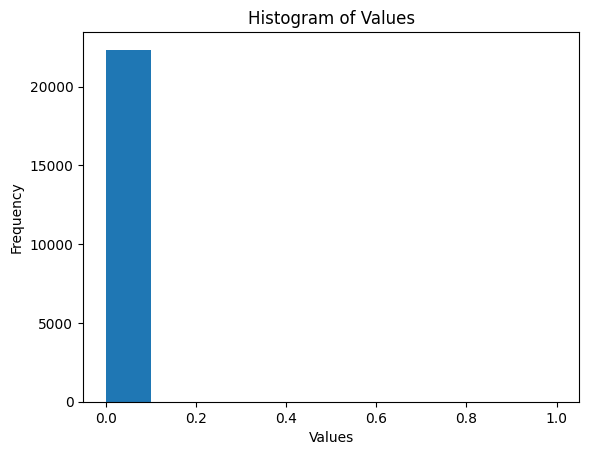

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(adj_list)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Display the histogram
plt.show()

In [ ]:
# # Making adjacency matrix using gaussian similarity
# distances = np.linalg.norm(x[:, None] - x, axis=-1)
# weight  = np.exp(-distances / (2 * 0.1 ** 2))
# np.fill_diagonal(weight, 0)
# print(weight)

In [ ]:
y = pd.get_dummies(y).values  # to one-hot encoded form

In [ ]:
# train/test - 70/30
nodes = weight.shape[0]
test_n = int(0.3 * nodes)
indexes = np.random.choice(nodes, test_n, replace = False)
y_train = y.copy()
y_train[indexes] = np.array([0] * y.shape[1])

In [ ]:
d = np.diag(np.sum(weight, axis = 1))
# print(d)
d_inv_sqrt = np.zeros((d.shape[0], d.shape[0]))
for i in range(d.shape[0]):
  d_inv_sqrt[i,i] = np.sqrt(d[i,i])**-1
# d_inv_sqrt

In [ ]:
S = d_inv_sqrt.dot(weight).dot(d_inv_sqrt)
y_pred = np.linalg.inv((np.identity(y.shape[0]) - alpha * S)).dot(y_train)

In [ ]:
y_pred = np.argmax(y_pred, axis = 1)
y = np.argmax(y, axis = 1)


In [ ]:
score = accuracy_score(y_pred, y)
score

0.98

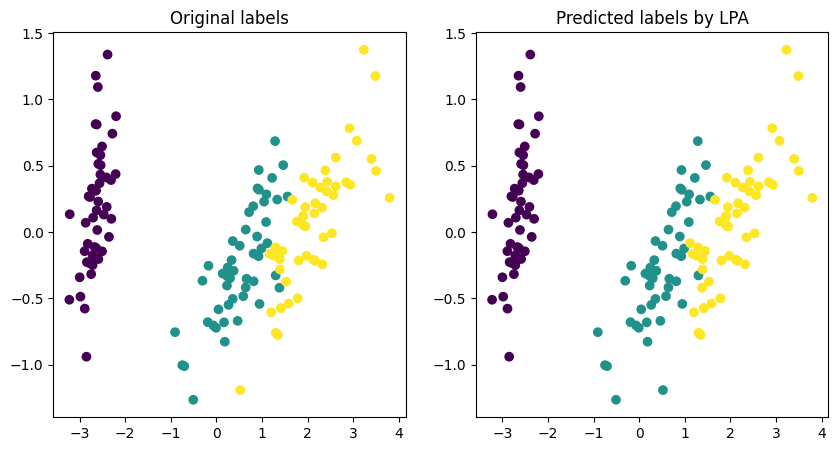

In [ ]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.title('Original labels')
plt.subplot(122)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred)
plt.title('Predicted labels by LPA')
plt.show()